In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.tree import export_graphviz
import graphviz
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV


!pip install imbalanced-learn
from imblearn.over_sampling import RandomOverSampler


!pip install matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

!pip install xgboost
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [2]:
dane_all = pd.read_excel('C:/Users/inga-/Desktop/SGH/Magisterka/4_semestr/MODEL/DANE/GTD_final.xlsx')

In [3]:
dane_all.columns

Index(['eventid', 'day_of_week', 'weekend', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'multiple', 'success', 'suicide',
       'attacktype1', 'attacktype1_txt', 'targtype1', 'targtype1_txt',
       'natlty1', 'natlty1_txt', 'gname', 'gname_final', 'weaptype1',
       'weaptype1_txt', 'ishostkid'],
      dtype='object')

In [4]:
dane = dane_all[['success', 'day_of_week', 'weekend', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'multiple',  'suicide',
       'attacktype1', 'attacktype1_txt', 'targtype1', 'targtype1_txt',
       'natlty1', 'natlty1_txt', 'gname', 'gname_final', 'weaptype1',
       'weaptype1_txt', 'ishostkid']]

In [5]:
dane.head()

,success,day_of_week,weekend,extended,country,country_txt,region,region_txt,multiple,suicide,...,attacktype1_txt,targtype1,targtype1_txt,natlty1,natlty1_txt,gname,gname_final,weaptype1,weaptype1_txt,ishostkid
0,1,6,1,0,139,Namibia,11,Sub-Saharan Africa,1.0,0,...,Armed Assault,1,Business,139.0,Namibia,National Union for the Total Independence of A...,Other group,5,Firearms,0.0
1,1,6,1,1,139,Namibia,11,Sub-Saharan Africa,1.0,0,...,Hostage Taking (Kidnapping),1,Business,139.0,Namibia,National Union for the Total Independence of A...,Other group,5,Firearms,1.0
2,1,6,1,0,1003,Kosovo,9,Eastern Europe,0.0,0,...,Bombing/Explosion,14,Private Citizens & Property,103.0,Kazakhstan,Unknown,Unknown,6,Explosives,0.0
3,1,6,1,0,19,Bangladesh,6,South Asia,1.0,0,...,Armed Assault,14,Private Citizens & Property,19.0,Bangladesh,Unknown,Unknown,6,Explosives,0.0
4,1,6,1,0,92,India,6,South Asia,0.0,0,...,Bombing/Explosion,21,Utilities,92.0,India,United Liberation Front of Assam (ULFA),United Liberation Front of Assam (ULFA),6,Explosives,0.0


In [6]:
dane.shape

(119396, 21)

In [7]:
dane["gname_final"].value_counts()

Unknown                                                 59734
Other group                                             20523
Taliban                                                 11390
Islamic State (IS)                                       7669
Boko Haram                                               2910
Al-Shabaab                                               2839
Houthi                                                   2697
Communist Party of India - Maoist (CPI-Maoist)           2036
New People's Army (NPA)                                  1624
Al-Qaida                                                 1558
Revolutionary Armed Forces of Colombia (FARC)            1296
Kurdistan Workers' Party (PKK)                           1027
National Liberation Army of Colombia (ELN)                587
Liberation Tigers of Tamil Eelam (LTTE)                   497
Abu Sayyaf Group (ASG)                                    460
Allied Democratic Forces (ADF)                            422
Hamas   

In [9]:
encoder = OrdinalEncoder()

kolumny_do_zakodowania = ['gname_final']

for kolumna in kolumny_do_zakodowania:
    czestotliwosci = dane[kolumna].value_counts()  
    kategorie_zakodowane = {kategoria: i + 1 for i, kategoria in enumerate(czestotliwosci.index)} 
    nowa_nazwa_kolumny = 'new_' + kolumna
    dane[nowa_nazwa_kolumny] = dane[kolumna].map(kategorie_zakodowane)  

for kolumna in kolumny_do_zakodowania:
    nowa_nazwa_kolumny = 'new_' + kolumna
    print(f"Oryginalna kolumna '{kolumna}':")
    print(dane[kolumna])
    print(f"Zakodowana kolumna '{nowa_nazwa_kolumny}':")
    print(dane[nowa_nazwa_kolumny])
    print()

Oryginalna kolumna 'gname_final':
0                                           Other group
1                                           Other group
2                                               Unknown
3                                               Unknown
4               United Liberation Front of Assam (ULFA)
                              ...                      
119391                               Islamic State (IS)
119392                                          Unknown
119393                                          Unknown
119394                                       Boko Haram
119395    Revolutionary Armed Forces of Colombia (FARC)
Name: gname_final, Length: 119396, dtype: object
Zakodowana kolumna 'new_gname_final':
0          2
1          2
2          1
3          1
4         18
          ..
119391     4
119392     1
119393     1
119394     5
119395    11
Name: new_gname_final, Length: 119396, dtype: int64



In [10]:
dane["new_gname_final"].value_counts()

1     59734
2     20523
3     11390
4      7669
5      2910
6      2839
7      2697
8      2036
9      1624
10     1558
11     1296
12     1027
13      587
14      497
15      460
16      422
17      365
18      315
19      307
20      299
21      285
22      284
23      272
Name: new_gname_final, dtype: int64

In [11]:
dane.rename(columns={'new_gname_final': 'group_name'}, inplace=True)

In [12]:
dane.columns

Index(['success', 'day_of_week', 'weekend', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'multiple', 'suicide',
       'attacktype1', 'attacktype1_txt', 'targtype1', 'targtype1_txt',
       'natlty1', 'natlty1_txt', 'gname', 'gname_final', 'weaptype1',
       'weaptype1_txt', 'ishostkid', 'nowa_gname_final', 'group_name'],
      dtype='object')

In [13]:
dane.describe()

,success,day_of_week,weekend,extended,country,region,multiple,suicide,attacktype1,targtype1,natlty1,weaptype1,ishostkid,nowa_gname_final,group_name
count,119396.000000,119396.000000,119396.000000,119396.000000,119396.000000,119396.000000,119393.000000,119396.000000,119396.000000,119396.000000,117800.000000,119396.000000,119395.000000,119396.000000,119396.000000
mean,0.868036,3.937787,0.282664,0.072071,119.967897,7.987998,0.169574,0.049474,3.445383,9.519197,121.257776,6.480359,0.054709,3.011583,3.011583
std,0.338453,2.023783,0.450297,0.258607,97.301549,2.411167,0.375260,0.216856,1.951137,6.662124,92.444416,2.168409,0.678439,3.622508,3.622508
min,0.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,1.000000,1.000000,4.000000,1.000000,-9.000000,1.000000,1.000000
25%,1.000000,2.000000,0.000000,0.000000,92.000000,6.000000,0.000000,0.000000,2.000000,3.000000,92.000000,5.000000,0.000000,1.000000,1.000000
50%,1.000000,4.000000,0.000000,0.000000,95.000000,9.000000,0.000000,0.000000,3.000000,14.000000,95.000000,6.000000,0.000000,1.000000,1.000000
75%,1.000000,6.000000,1.000000,0.000000,155.000000,10.000000,0.000000,0.000000,3.000000,14.000000,160.000000,6.000000,0.000000,3.000000,3.000000
max,1.000000,7.000000,1.000000,1.000000,1004.000000,12.000000,1.000000,1.000000,9.000000,22.000000,1004.000000,13.000000,1.000000,23.000000,23.000000


In [14]:
null_licznosc = dane.isnull().sum()
print(null_licznosc)

success                0
day_of_week            0
weekend                0
extended               0
country                0
country_txt            0
region                 0
region_txt             0
multiple               3
suicide                0
attacktype1            0
attacktype1_txt        0
targtype1              0
targtype1_txt          0
natlty1             1596
natlty1_txt         1596
gname                  0
gname_final            0
weaptype1              0
weaptype1_txt          0
ishostkid              1
nowa_gname_final       0
group_name             0
dtype: int64


In [15]:
dane = dane.dropna()

In [16]:
dane.shape

(117796, 23)

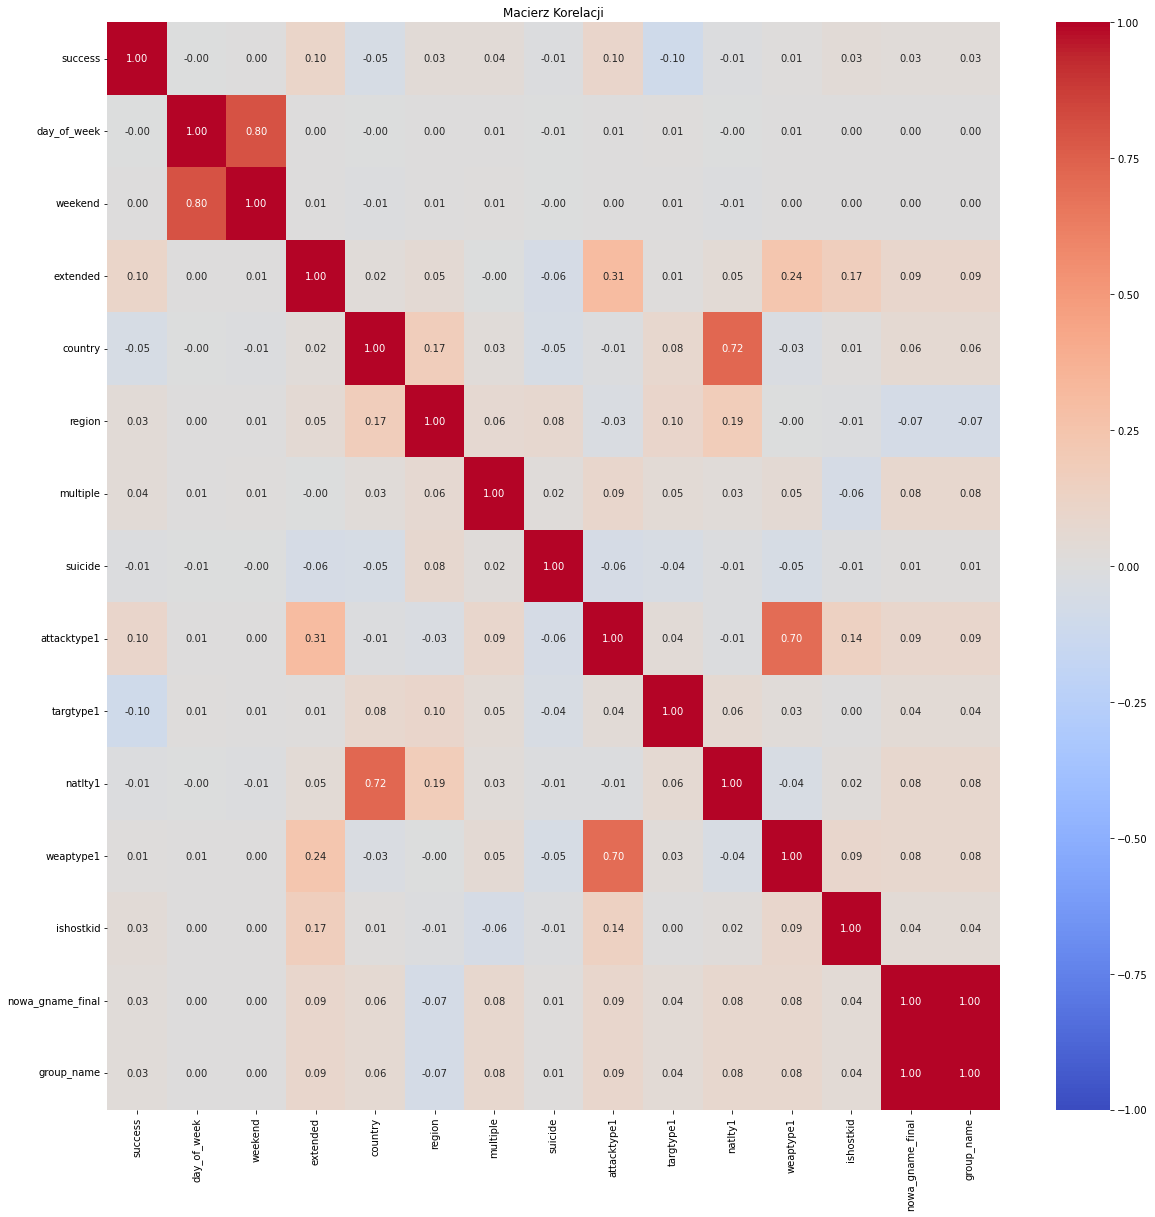

In [17]:
korelacja = dane.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(korelacja, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Macierz Korelacji')
plt.savefig('macierz_korelacji.png', dpi=300, bbox_inches='tight')
plt.show()

In [18]:
dane.columns

Index(['success', 'day_of_week', 'weekend', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'multiple', 'suicide',
       'attacktype1', 'attacktype1_txt', 'targtype1', 'targtype1_txt',
       'natlty1', 'natlty1_txt', 'gname', 'gname_final', 'weaptype1',
       'weaptype1_txt', 'ishostkid', 'nowa_gname_final', 'group_name'],
      dtype='object')

In [19]:
kolumny_do_usuniecia = ['day_of_week', 'weekend', 'suicide', 'natlty1', 'weaptype1']

dane = dane.drop(columns=kolumny_do_usuniecia)

In [20]:
dane.corr()

,success,extended,country,region,multiple,attacktype1,targtype1,ishostkid,nowa_gname_final,group_name
success,1.000000,0.104001,-0.049945,0.033202,0.037411,0.095151,-0.098063,0.034639,0.031053,0.031053
extended,0.104001,1.000000,0.023439,0.051955,-0.004962,0.312406,0.011811,0.166329,0.092353,0.092353
country,-0.049945,0.023439,1.000000,0.174913,0.027197,-0.012213,0.082567,0.010597,0.061855,0.061855
region,0.033202,0.051955,0.174913,1.000000,0.062586,-0.027825,0.095292,-0.013725,-0.069385,-0.069385
multiple,0.037411,-0.004962,0.027197,0.062586,1.000000,0.090935,0.046532,-0.059543,0.083431,0.083431
attacktype1,0.095151,0.312406,-0.012213,-0.027825,0.090935,1.000000,0.037702,0.143104,0.088114,0.088114
targtype1,-0.098063,0.011811,0.082567,0.095292,0.046532,0.037702,1.000000,0.004684,0.042255,0.042255
ishostkid,0.034639,0.166329,0.010597,-0.013725,-0.059543,0.143104,0.004684,1.000000,0.039830,0.039830
nowa_gname_final,0.031053,0.092353,0.061855,-0.069385,0.083431,0.088114,0.042255,0.039830,1.000000,1.000000
group_name,0.031053,0.092353,0.061855,-0.069385,0.083431,0.088114,0.042255,0.039830,1.000000,1.000000


In [21]:
dane.columns

Index(['success', 'extended', 'country', 'country_txt', 'region', 'region_txt',
       'multiple', 'attacktype1', 'attacktype1_txt', 'targtype1',
       'targtype1_txt', 'natlty1_txt', 'gname', 'gname_final', 'weaptype1_txt',
       'ishostkid', 'nowa_gname_final', 'group_name'],
      dtype='object')

In [22]:
dane["extended"].value_counts()

0    109211
1      8585
Name: extended, dtype: int64

In [23]:
tabela_licznosci = pd.crosstab(index=dane['extended'], columns=dane['success'])
print(tabela_licznosci)

success       0      1
extended              
0         14909  94302
1            29   8556


In [24]:
dane["country_txt"].value_counts()

Iraq                 24124
Afghanistan          15342
Pakistan             11930
India                 9988
Nigeria               5204
                     ...  
Gambia                   1
Bahamas                  1
Romania                  1
Equatorial Guinea        1
El Salvador              1
Name: country_txt, Length: 168, dtype: int64

In [25]:
tabela_licznosci_country = pd.crosstab(index=dane['country_txt'], columns=dane['success'])
print(tabela_licznosci_country)

success            0      1
country_txt                
Afghanistan     1299  14043
Albania            4     10
Algeria           74    859
Angola             2     63
Argentina          4     30
...              ...    ...
Western Sahara     1      2
Yemen            688   3699
Yugoslavia         6     25
Zambia             1     10
Zimbabwe           1     28

[168 rows x 2 columns]


In [27]:
encoder = OrdinalEncoder()

kolumny_do_zakodowania = ['country_txt']

for kolumna in kolumny_do_zakodowania:
    czestotliwosci = dane[kolumna].value_counts()  
    kategorie_zakodowane = {kategoria: i + 1 for i, kategoria in enumerate(czestotliwosci.index)} 
    nowa_nazwa_kolumny = 'new_' + kolumna
    dane[nowa_nazwa_kolumny] = dane[kolumna].map(kategorie_zakodowane)  

for kolumna in kolumny_do_zakodowania:
    nowa_nazwa_kolumny = 'new_' + kolumna
    print(f"Oryginalna kolumna '{kolumna}':")
    print(dane[kolumna])
    print(f"Zakodowana kolumna '{nowa_nazwa_kolumny}':")
    print(dane[nowa_nazwa_kolumny])
    print()

Oryginalna kolumna 'country_txt':
0             Namibia
1             Namibia
2              Kosovo
3          Bangladesh
4               India
             ...     
119391           Iraq
119392    Afghanistan
119393        Myanmar
119394        Nigeria
119395       Colombia
Name: country_txt, Length: 117796, dtype: object
Zakodowana kolumna 'new_country_txt':
0         96
1         96
2         54
3         21
4          4
          ..
119391     1
119392     2
119393    31
119394     5
119395    10
Name: new_country_txt, Length: 117796, dtype: int64



In [28]:
dane["new_country_txt"].value_counts()

1      24124
2      15342
3      11930
4       9988
5       5204
       ...  
164        1
165        1
166        1
167        1
168        1
Name: new_country_txt, Length: 168, dtype: int64

In [29]:
unikalny_df = pd.DataFrame({'country_txt': dane['country_txt'].unique(), 'new_country_txt': dane['new_country_txt'].unique()})
posortowany_df = unikalny_df.sort_values(by='new_country_txt')

print(posortowany_df)

           country_txt  new_country_txt
37                Iraq                1
40         Afghanistan                2
30            Pakistan                3
3                India                4
13             Nigeria                5
..                 ...              ...
71              Gambia              164
155            Bahamas              165
142            Romania              166
147  Equatorial Guinea              167
167        El Salvador              168

[168 rows x 2 columns]


In [30]:
dane["region_txt"].value_counts()

South Asia                     40589
Middle East & North Africa     40470
Sub-Saharan Africa             16124
Southeast Asia                  9408
Western Europe                  3612
South America                   3077
Eastern Europe                  2967
North America                    898
Central Asia                     214
East Asia                        212
Central America & Caribbean      117
Australasia & Oceania            108
Name: region_txt, dtype: int64

In [32]:
regiony_do_zmiany = ["North America", "Central Asia", "East Asia", "Central America & Caribbean", "Australasia & Oceania"]
nazwa_nowego_regionu = "Other region"

dane['region_txt'] = dane['region_txt'].replace(regiony_do_zmiany, nazwa_nowego_regionu)

In [33]:
dane["region_txt"].value_counts()

South Asia                    40589
Middle East & North Africa    40470
Sub-Saharan Africa            16124
Southeast Asia                 9408
Western Europe                 3612
South America                  3077
Eastern Europe                 2967
Other region                   1549
Name: region_txt, dtype: int64

In [34]:
tabela_licznosci_region = pd.crosstab(index=dane['region_txt'], columns=dane['success'])
print(tabela_licznosci_region)

success                        0      1
region_txt                             
Eastern Europe               441   2526
Middle East & North Africa  5110  35360
Other region                 252   1297
South America                337   2740
South Asia                  5461  35128
Southeast Asia              1218   8190
Sub-Saharan Africa          1231  14893
Western Europe               888   2724


In [35]:
dane["multiple"].value_counts()

0.0    97776
1.0    20020
Name: multiple, dtype: int64

In [36]:
tabela_licznosci_multiple = pd.crosstab(index=dane['multiple'], columns=dane['success'])
print(tabela_licznosci_multiple)

success       0      1
multiple              
0.0       12950  84826
1.0        1988  18032


In [37]:
dane["attacktype1_txt"].value_counts()

Bombing/Explosion                      58762
Armed Assault                          26169
Hostage Taking (Kidnapping)            10146
Assassination                           8527
Facility/Infrastructure Attack          7429
Unknown                                 5158
Unarmed Assault                          714
Hostage Taking (Barricade Incident)      498
Hijacking                                393
Name: attacktype1_txt, dtype: int64

In [38]:
tabela_licznosci_attacktype1 = pd.crosstab(index=dane['attacktype1_txt'], columns=dane['success'])
print(tabela_licznosci_attacktype1)

success                                 0      1
attacktype1_txt                                 
Armed Assault                        1754  24415
Assassination                        3275   5252
Bombing/Explosion                    8405  50357
Facility/Infrastructure Attack        274   7155
Hijacking                              29    364
Hostage Taking (Barricade Incident)     6    492
Hostage Taking (Kidnapping)           176   9970
Unarmed Assault                        86    628
Unknown                               933   4225


In [41]:
typy_ataku_do_zmiany = ["Unarmed Assault", "Hostage Taking (Barricade Incident)", "Hijacking", "Unknown"]
nazwa_nowego_typu_ataku = "Other attack type"

dane['attacktype1_txt'] = dane['attacktype1_txt'].replace(typy_ataku_do_zmiany, nazwa_nowego_typu_ataku)

In [42]:
dane["attacktype1_txt"].value_counts()

Bombing/Explosion                 58762
Armed Assault                     26169
Hostage Taking (Kidnapping)       10146
Assassination                      8527
Facility/Infrastructure Attack     7429
Other attack type                  6763
Name: attacktype1_txt, dtype: int64

In [43]:
tabela_licznosci_attacktype1 = pd.crosstab(index=dane['attacktype1_txt'], columns=dane['success'])
print(tabela_licznosci_attacktype1)

success                            0      1
attacktype1_txt                            
Armed Assault                   1754  24415
Assassination                   3275   5252
Bombing/Explosion               8405  50357
Facility/Infrastructure Attack   274   7155
Hostage Taking (Kidnapping)      176   9970
Other attack type               1054   5709


In [44]:
dane["targtype1_txt"].value_counts()

Private Citizens & Property       38928
Police                            20863
Government (General)              14672
Business                          10236
Military                           5044
Unknown                            5017
Religious Figures/Institutions     3701
Transportation                     3508
Educational Institution            3329
Utilities                          2677
Terrorists/Non-State Militia       2661
Journalists & Media                1640
Government (Diplomatic)            1477
Violent Political Party            1192
Telecommunication                   869
NGO                                 784
Airports & Aircraft                 434
Maritime                            193
Food or Water Supply                183
Other                               180
Tourists                            172
Abortion Related                     36
Name: targtype1_txt, dtype: int64

In [45]:
typy_ofiary_do_zmiany_1 = ["Police", "Military"]
nazwa_nowego_typu_ofiary_1 = "Police & Military"

typy_ofiary_do_zmiany_2 = ["Government (General)", "Government (Diplomatic)", "Violent Political Party"]
nazwa_nowego_typu_ofiary_2 = "Authorities"

typy_ofiary_do_zmiany_3 = ["Unknown", "Religious Figures/Institutions", "Transportation", "Educational Institution",
                            "Utilities", "Terrorists/Non-State Militia", "Journalists & Media", "Telecommunication", "NGO", 
                            "Airports & Aircraft", "Maritime", "Food or Water Supply", "Other", "Tourists", "Abortion Related"]
nazwa_nowego_typu_ofiary_3 = "Other"

dane['targtype1_txt'] = dane['targtype1_txt'].replace(typy_ofiary_do_zmiany_1, nazwa_nowego_typu_ofiary_1)
dane['targtype1_txt'] = dane['targtype1_txt'].replace(typy_ofiary_do_zmiany_2, nazwa_nowego_typu_ofiary_2)
dane['targtype1_txt'] = dane['targtype1_txt'].replace(typy_ofiary_do_zmiany_3, nazwa_nowego_typu_ofiary_3)

In [46]:
dane["targtype1_txt"].value_counts()

Private Citizens & Property    38928
Police & Military              25907
Other                          25384
Authorities                    17341
Business                       10236
Name: targtype1_txt, dtype: int64

In [47]:
tabela_licznosci_targtype1 = pd.crosstab(index=dane['targtype1_txt'], columns=dane['success'])
print(tabela_licznosci_targtype1)

success                         0      1
targtype1_txt                           
Authorities                  3115  14226
Business                      626   9610
Other                        5794  19590
Police & Military            2538  23369
Private Citizens & Property  2865  36063


In [48]:
dane["ishostkid"].value_counts()

 0.0    105869
 1.0     11385
-9.0       542
Name: ishostkid, dtype: int64

In [49]:
dane['ishostkid'] = dane['ishostkid'].replace(-9, 0)
dane["ishostkid"].value_counts()

0.0    106411
1.0     11385
Name: ishostkid, dtype: int64

In [50]:
tabela_licznosci_ishostkid = pd.crosstab(index=dane['ishostkid'], columns=dane['success'])
print(tabela_licznosci_ishostkid)

success        0      1
ishostkid              
0.0        14905  91506
1.0           33  11352


In [51]:
dane["gname_final"].value_counts()

Unknown                                                 58816
Other group                                             20375
Taliban                                                 11004
Islamic State (IS)                                       7635
Boko Haram                                               2908
Al-Shabaab                                               2768
Houthi                                                   2691
Communist Party of India - Maoist (CPI-Maoist)           2036
New People's Army (NPA)                                  1622
Al-Qaida                                                 1555
Revolutionary Armed Forces of Colombia (FARC)            1296
Kurdistan Workers' Party (PKK)                           1024
National Liberation Army of Colombia (ELN)                586
Liberation Tigers of Tamil Eelam (LTTE)                   497
Abu Sayyaf Group (ASG)                                    460
Allied Democratic Forces (ADF)                            422
Hamas   

In [52]:
tabela_licznosci_gname = pd.crosstab(index=dane['gname_final'], columns=dane['success'])
print(tabela_licznosci_gname)

success                                                0      1
gname_final                                                    
Abu Sayyaf Group (ASG)                                66    394
Al-Qaida                                             127   1428
Al-Shabaab                                           258   2510
Allied Democratic Forces (ADF)                        10    412
Baloch Republican Army (BRA)                          19    253
Bangsamoro Islamic Freedom Movement (BIFM)            93    214
Boko Haram                                           208   2700
Communist Party of India - Maoist (CPI-Maoist)       134   1902
Communist Party of Nepal - Maoist (CPN-Maoist-C...    93    206
Hamas                                                 46    294
Houthi                                               519   2172
Islamic State (IS)                                   833   6802
Kurdistan Workers' Party (PKK)                        84    940
Liberation Tigers of Tamil Eelam (LTTE) 

### one-hot encoding

In [53]:
region_one_hot = pd.get_dummies(dane['region_txt'], prefix='region')
dane = pd.concat([dane, region_one_hot], axis=1)


attack_one_hot = pd.get_dummies(dane['attacktype1_txt'], prefix='attack')
dane = pd.concat([dane, attack_one_hot], axis=1)

targtype_one_hot = pd.get_dummies(dane['targtype1_txt'], prefix = 'targtype')
dane = pd.concat([dane, targtype_one_hot], axis = 1)


print(dane.head())

   success  extended  country country_txt  region          region_txt  \
0        1         0      139     Namibia      11  Sub-Saharan Africa   
1        1         1      139     Namibia      11  Sub-Saharan Africa   
2        1         0     1003      Kosovo       9      Eastern Europe   
3        1         0       19  Bangladesh       6          South Asia   
4        1         0       92       India       6          South Asia   

   multiple  attacktype1              attacktype1_txt  targtype1  ...  \
0       1.0            2                Armed Assault          1  ...   
1       1.0            6  Hostage Taking (Kidnapping)          1  ...   
2       0.0            3            Bombing/Explosion         14  ...   
3       1.0            2                Armed Assault         14  ...   
4       0.0            3            Bombing/Explosion         21  ...   

  attack_Assassination attack_Bombing/Explosion  \
0                    0                        0   
1                   

In [54]:
dane.columns

Index(['success', 'extended', 'country', 'country_txt', 'region', 'region_txt',
       'multiple', 'attacktype1', 'attacktype1_txt', 'targtype1',
       'targtype1_txt', 'natlty1_txt', 'gname', 'gname_final', 'weaptype1_txt',
       'ishostkid', 'nowa_gname_final', 'group_name', 'nowa_country_txt',
       'new_country_txt', 'region_Eastern Europe',
       'region_Middle East & North Africa', 'region_Other region',
       'region_South America', 'region_South Asia', 'region_Southeast Asia',
       'region_Sub-Saharan Africa', 'region_Western Europe',
       'attack_Armed Assault', 'attack_Assassination',
       'attack_Bombing/Explosion', 'attack_Facility/Infrastructure Attack',
       'attack_Hostage Taking (Kidnapping)', 'attack_Other attack type',
       'targtype_Authorities', 'targtype_Business', 'targtype_Other',
       'targtype_Police & Military', 'targtype_Private Citizens & Property'],
      dtype='object')

In [55]:
dane.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117796 entries, 0 to 119395
Data columns (total 39 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   success                                117796 non-null  int64  
 1   extended                               117796 non-null  int64  
 2   country                                117796 non-null  int64  
 3   country_txt                            117796 non-null  object 
 4   region                                 117796 non-null  int64  
 5   region_txt                             117796 non-null  object 
 6   multiple                               117796 non-null  float64
 7   attacktype1                            117796 non-null  int64  
 8   attacktype1_txt                        117796 non-null  object 
 9   targtype1                              117796 non-null  int64  
 10  targtype1_txt                          117796 non-null  

In [56]:
dane = dane[['success', 'extended', 'multiple', 'group_name',
        'region_Eastern Europe',
       'region_Middle East & North Africa', 'region_Other region',
       'region_South America', 'region_South Asia', 'region_Southeast Asia',
       'region_Sub-Saharan Africa', 'region_Western Europe',
       'attack_Armed Assault', 'attack_Assassination',
       'attack_Bombing/Explosion', 'attack_Facility/Infrastructure Attack',
       'attack_Hostage Taking (Kidnapping)', 'attack_Other attack type',
        'targtype_Authorities', 'targtype_Business',
       'targtype_Other', 'targtype_Police & Military',
       'targtype_Private Citizens & Property'
                ]]

In [57]:
dane.columns

Index(['success', 'extended', 'multiple', 'group_name',
       'region_Eastern Europe', 'region_Middle East & North Africa',
       'region_Other region', 'region_South America', 'region_South Asia',
       'region_Southeast Asia', 'region_Sub-Saharan Africa',
       'region_Western Europe', 'attack_Armed Assault', 'attack_Assassination',
       'attack_Bombing/Explosion', 'attack_Facility/Infrastructure Attack',
       'attack_Hostage Taking (Kidnapping)', 'attack_Other attack type',
       'targtype_Authorities', 'targtype_Business', 'targtype_Other',
       'targtype_Police & Military', 'targtype_Private Citizens & Property'],
      dtype='object')

In [58]:
dane.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117796 entries, 0 to 119395
Data columns (total 23 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   success                                117796 non-null  int64  
 1   extended                               117796 non-null  int64  
 2   multiple                               117796 non-null  float64
 3   group_name                             117796 non-null  int64  
 4   region_Eastern Europe                  117796 non-null  uint8  
 5   region_Middle East & North Africa      117796 non-null  uint8  
 6   region_Other region                    117796 non-null  uint8  
 7   region_South America                   117796 non-null  uint8  
 8   region_South Asia                      117796 non-null  uint8  
 9   region_Southeast Asia                  117796 non-null  uint8  
 10  region_Sub-Saharan Africa              117796 non-null  

In [59]:
dane["multiple"] = dane["multiple"].astype(int)

### Oversampling

In [60]:
oversampler = RandomOverSampler(random_state=42)

x = dane.drop('success', axis=1)
y = dane['success']


x_oversampling, y_oversampling = oversampler.fit_resample(x, y)

In [61]:
x_oversampling.shape

(205716, 22)

In [62]:
y_oversampling.shape

(205716,)

In [63]:
print("Liczność klas przed oversamplingiem:")
print(y.value_counts())


print("Liczność klas po oversamplingu:")
print(pd.Series(y_oversampling).value_counts())

Liczność klas przed oversamplingiem:
1    102858
0     14938
Name: success, dtype: int64
Liczność klas po oversamplingu:
1    102858
0    102858
Name: success, dtype: int64


## Drzewo decyzyjne

### Budowa modelu

In [64]:
dane_train_x, dane_test_x, dane_train_y, dane_test_y = train_test_split(x_oversampling, y_oversampling, test_size=0.3, random_state=1)

In [65]:
tree = DecisionTreeClassifier(random_state = 0, max_depth = 6, min_samples_leaf = 100)

In [66]:
tree.fit(dane_train_x, dane_train_y)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=100, random_state=0)

In [67]:
y_predykcja_train = tree.predict(dane_train_x)

In [68]:
dokladnosc_train = accuracy_score(dane_train_y, y_predykcja_train)
print("Dokładność klasyfikacji na danych uczących: ", round(dokladnosc_train,4))

Dokładność klasyfikacji na danych uczących:  0.7199


In [69]:
y_predykcja_test = tree.predict(dane_test_x)

In [70]:
dokladnosc_test = accuracy_score(dane_test_y, y_predykcja_test)
print("Dokładność klasyfikacji na danych testowych: ", round(dokladnosc_test,4))

Dokładność klasyfikacji na danych testowych:  0.7213


### Walidacja krzyżowa

In [71]:
scores_tree = cross_val_score(tree, dane_train_x, dane_train_y, cv = 15)

print("Dokładność predykcji: ", scores_tree)
print("Średnia dokładność: ", round(scores_tree.mean(),4))

Dokładność predykcji:  [0.72773669 0.7225     0.7178125  0.71979167 0.71833333 0.71510417
 0.72291667 0.70979167 0.71614583 0.71489583 0.7190625  0.72677083
 0.71802083 0.719375   0.72322917]
Średnia dokładność:  0.7194


### Wykres drzewa

In [72]:
dane_test_x.shape

(61715, 22)

In [73]:
kolumny = dane_test_x.columns
col = kolumny[0:23]

drzewo = export_graphviz(tree, out_file=None, feature_names=col, filled=True, rounded=True)

graph = graphviz.Source(drzewo)
graph.view()

'Source.gv.pdf'

In [74]:
waznosc = tree.feature_importances_
cechy = dane_train_x.columns


waznosc_df = pd.DataFrame({'Cecha': cechy, 'Ważność': waznosc})
waznosc_df = waznosc_df.sort_values(by='Ważność', ascending=False)
waznosc_df['Ważność'] = round(waznosc_df['Ważność'], 4)

print(waznosc_df)

                                    Cecha  Ważność
19                         targtype_Other   0.3153
12                   attack_Assassination   0.2602
13               attack_Bombing/Explosion   0.1653
0                                extended   0.0820
16               attack_Other attack type   0.0572
10                  region_Western Europe   0.0411
2                              group_name   0.0188
14  attack_Facility/Infrastructure Attack   0.0162
21   targtype_Private Citizens & Property   0.0118
4       region_Middle East & North Africa   0.0083
1                                multiple   0.0064
6                    region_South America   0.0038
9               region_Sub-Saharan Africa   0.0036
17                   targtype_Authorities   0.0033
7                       region_South Asia   0.0030
8                   region_Southeast Asia   0.0020
20             targtype_Police & Military   0.0015
15     attack_Hostage Taking (Kidnapping)   0.0003
18                      targtyp

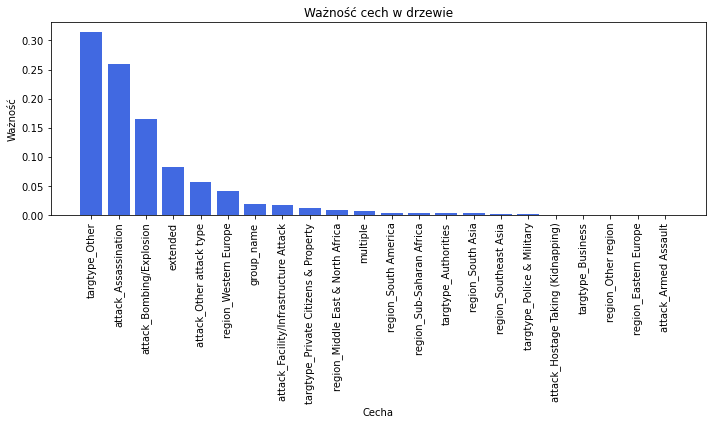

In [75]:
plt.figure(figsize=(10, 6))
plt.bar(waznosc_df['Cecha'], waznosc_df['Ważność'], color='royalblue')


plt.title('Ważność cech w drzewie')
plt.xlabel('Cecha')
plt.ylabel('Ważność')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('waznosc_drzewo.png', dpi=300, bbox_inches='tight')
plt.show()

### Ocena jakości modelu

#### Macierz pomyłek

In [76]:
macierz_pomylek_tree = confusion_matrix(dane_test_y, y_predykcja_test)

print("Macierz pomylek:")
print(macierz_pomylek_tree)

Macierz pomylek:
[[20185 10642]
 [ 6557 24331]]


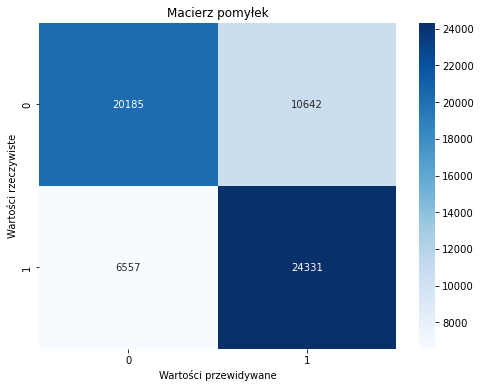

In [77]:
labels = ['0', '1']  


plt.figure(figsize=(8, 6))
sns.heatmap(macierz_pomylek_tree, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Wartości przewidywane')
plt.ylabel('Wartości rzeczywiste')
plt.title('Macierz pomyłek')
plt.savefig('macierz_pomylek_drzewo.png', dpi=300, bbox_inches='tight')
plt.show()

#### Miary jakosci klasyfikatora

In [78]:
TN = macierz_pomylek_tree[0, 0]
FP = macierz_pomylek_tree[0, 1]
FN = macierz_pomylek_tree[1, 0]
TP = macierz_pomylek_tree[1, 1]

czulosc = TP / (TP + FN)
specyficznosc = TN / (TN + FP)
precyzja = TP / (TP + FP)
statystyka_f1 = 2 * (precyzja * czulosc) / (precyzja + czulosc)

print("Czułość:", round(czulosc,4))
print("Specyficzność:", round(specyficznosc,4))
print("Precyzja:", round(precyzja,4))
print("F1-score:", round(statystyka_f1, 4))

Czułość: 0.7877
Specyficzność: 0.6548
Precyzja: 0.6957
F1-score: 0.7389


#### Krzywa ROC

In [79]:
y_pred_tree_proba = tree.predict_proba(dane_test_x)
y_pred_tree_proba[0:5]

array([[0.3644756 , 0.6355244 ],
       [0.3644756 , 0.6355244 ],
       [0.3644756 , 0.6355244 ],
       [0.29103101, 0.70896899],
       [0.29103101, 0.70896899]])

In [80]:
fpr, tpr, prog_odciecia = roc_curve(dane_test_y, y_pred_tree_proba[:,1])

In [81]:
for i, prog_odciecia in enumerate(prog_odciecia):
    print("TPR: {:.2f}, FPR: {:.2f}, Próg odcięcia {:.2f}".format(tpr[i], fpr[i], prog_odciecia))

TPR: 0.00, FPR: 0.00, Próg odcięcia inf
TPR: 0.02, FPR: 0.00, Próg odcięcia 1.00
TPR: 0.07, FPR: 0.00, Próg odcięcia 1.00
TPR: 0.08, FPR: 0.00, Próg odcięcia 0.98
TPR: 0.08, FPR: 0.00, Próg odcięcia 0.90
TPR: 0.08, FPR: 0.00, Próg odcięcia 0.89
TPR: 0.08, FPR: 0.00, Próg odcięcia 0.86
TPR: 0.09, FPR: 0.00, Próg odcięcia 0.83
TPR: 0.09, FPR: 0.00, Próg odcięcia 0.82
TPR: 0.11, FPR: 0.01, Próg odcięcia 0.80
TPR: 0.38, FPR: 0.12, Próg odcięcia 0.71
TPR: 0.39, FPR: 0.12, Próg odcięcia 0.69
TPR: 0.39, FPR: 0.12, Próg odcięcia 0.67
TPR: 0.42, FPR: 0.14, Próg odcięcia 0.67
TPR: 0.43, FPR: 0.14, Próg odcięcia 0.66
TPR: 0.43, FPR: 0.14, Próg odcięcia 0.64
TPR: 0.79, FPR: 0.34, Próg odcięcia 0.64
TPR: 0.79, FPR: 0.34, Próg odcięcia 0.56
TPR: 0.79, FPR: 0.35, Próg odcięcia 0.56
TPR: 0.79, FPR: 0.35, Próg odcięcia 0.50
TPR: 0.82, FPR: 0.38, Próg odcięcia 0.49
TPR: 0.83, FPR: 0.39, Próg odcięcia 0.45
TPR: 0.83, FPR: 0.39, Próg odcięcia 0.44
TPR: 0.84, FPR: 0.41, Próg odcięcia 0.44
TPR: 0.84, FPR: 0

In [82]:
auc_tree = roc_auc_score(dane_test_y, y_pred_tree_proba[:,1])
print("Pole pod krzywa ROC: {:.2f}".format(auc_tree))

Pole pod krzywa ROC: 0.77


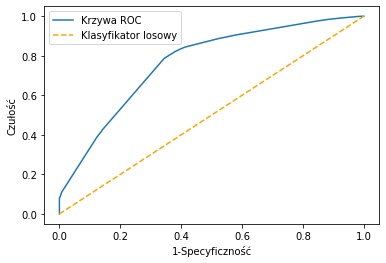

In [83]:
plt.plot(fpr, tpr, label = "Krzywa ROC")
plt.plot([0,1], [0,1], linestyle = "--", label = "Klasyfikator losowy", color = "orange")
plt.xlabel("1-Specyficzność")
plt.ylabel("Czułość")
plt.legend()
plt.savefig('roc_drzewo.png', dpi=300, bbox_inches='tight')
plt.show()

## Las losowy

### Budowa modelu

In [84]:
Forest = RandomForestClassifier(n_estimators=100, random_state = 1)
Forest.fit(dane_train_x, dane_train_y)

RandomForestClassifier(random_state=1)

In [85]:
y_predykcja_train_forest = Forest.predict(dane_train_x)

dokladnosc_train_forest = accuracy_score(dane_train_y, y_predykcja_train_forest)
print("Dokładność klasyfikacji na danych uczących: ", round(dokladnosc_train_forest,4))

Dokładność klasyfikacji na danych uczących:  0.756


In [86]:
y_predykcja_test_forest = Forest.predict(dane_test_x)
dokladnosc_test_forest = accuracy_score(dane_test_y, y_predykcja_test_forest)
print("Dokładność predykcji lasu na danych testowych: ", round(dokladnosc_test_forest,4))

Dokładność predykcji lasu na danych testowych:  0.7519


### Walidacja krzyżowa

In [87]:
scores_forest = cross_val_score(Forest, dane_train_x, dane_train_y, cv = 15)

print("Dokładność predykcji: ", scores_forest)
print("Średnia dokładność: ", round(scores_forest.mean(),4))

Dokładność predykcji:  [0.75471305 0.759375   0.7509375  0.750625   0.74458333 0.75260417
 0.75125    0.73979167 0.75145833 0.74302083 0.7540625  0.75364583
 0.75385417 0.7496875  0.7496875 ]
Średnia dokładność:  0.7506


#### Macierz pomyłek

In [88]:
macierz_pomylek_forest = confusion_matrix(dane_test_y, y_predykcja_test_forest)

print("Macierz pomyłek:")
print(macierz_pomylek_forest)

Macierz pomyłek:
[[22468  8359]
 [ 6950 23938]]


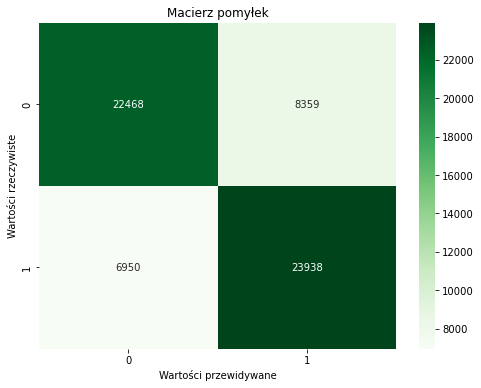

In [89]:
labels = ['0', '1']  


plt.figure(figsize=(8, 6))
sns.heatmap(macierz_pomylek_forest, annot=True, fmt="d", cmap="Greens", xticklabels=labels, yticklabels=labels)
plt.xlabel('Wartości przewidywane')
plt.ylabel('Wartości rzeczywiste')
plt.title('Macierz pomyłek')
plt.savefig('macierz_pomylek_las.png', dpi=300, bbox_inches='tight')
plt.show()

#### Miary jakości klasyfikatora

In [90]:
TN = macierz_pomylek_forest[0, 0]
FP = macierz_pomylek_forest[0, 1]
FN = macierz_pomylek_forest[1, 0]
TP = macierz_pomylek_forest[1, 1]

czulosc = TP / (TP + FN)
specyficznosc = TN / (TN + FP)
precyzja = TP / (TP + FP)
statystyka_f1 = 2 * (precyzja * czulosc) / (precyzja + czulosc)

print("Czułość:", round(czulosc,4))
print("Specyficzność:", round(specyficznosc,4))
print("Precyzja:", round(precyzja,4))
print("F1-score:", round(statystyka_f1, 4))

Czułość: 0.775
Specyficzność: 0.7288
Precyzja: 0.7412
F1-score: 0.7577


#### Krzywa ROC

In [91]:
y_pred_prob = Forest.predict_proba(dane_test_x)[:,1]

In [92]:
fpr, tpr, prog_odciecia = roc_curve(dane_test_y, y_pred_prob)

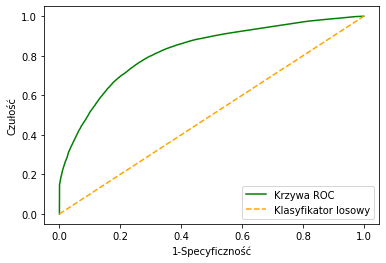

In [93]:
plt.plot(fpr, tpr, label = "Krzywa ROC", color = "green")
plt.plot([0,1], [0,1], linestyle = "--", label = "Klasyfikator losowy", color = "orange")
plt.xlabel("1-Specyficzność")
plt.ylabel("Czułość")
plt.legend()
plt.savefig('roc_las.png', dpi=300, bbox_inches='tight')
plt.show()

In [94]:
auc_forest = roc_auc_score(dane_test_y, y_pred_prob)

print("Pole pod krzywą ROC wynosi: ", round(auc_forest, 4))

Pole pod krzywą ROC wynosi:  0.8228


#### Istotność cech

In [95]:
waznosc_las = Forest.feature_importances_
cechy_las = dane_train_x.columns


waznosc_df_las = pd.DataFrame({'Cecha': cechy_las, 'Ważność': waznosc_las})
waznosc_df_las = waznosc_df_las.sort_values(by='Ważność', ascending=False)
waznosc_df_las['Ważność'] = round(waznosc_df_las['Ważność'], 4)

print(waznosc_df_las)

                                    Cecha  Ważność
2                              group_name   0.1604
12                   attack_Assassination   0.1479
19                         targtype_Other   0.1301
0                                extended   0.0727
13               attack_Bombing/Explosion   0.0661
11                   attack_Armed Assault   0.0535
14  attack_Facility/Infrastructure Attack   0.0431
21   targtype_Private Citizens & Property   0.0431
15     attack_Hostage Taking (Kidnapping)   0.0369
1                                multiple   0.0346
10                  region_Western Europe   0.0316
16               attack_Other attack type   0.0265
4       region_Middle East & North Africa   0.0263
17                   targtype_Authorities   0.0233
20             targtype_Police & Military   0.0221
9               region_Sub-Saharan Africa   0.0166
18                      targtype_Business   0.0164
7                       region_South Asia   0.0158
8                   region_Sout

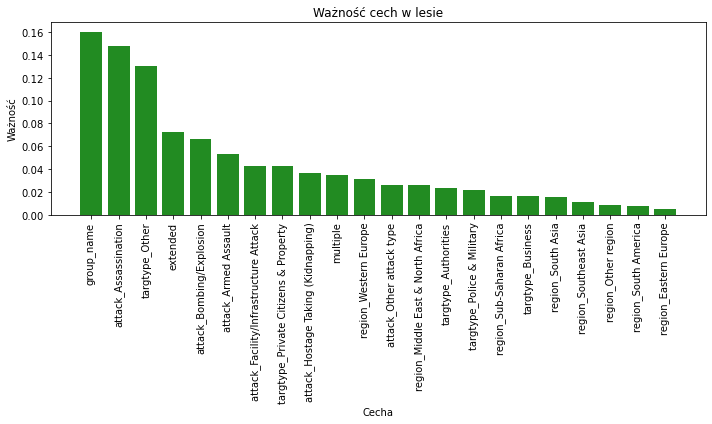

In [96]:
plt.figure(figsize=(10, 6))
plt.bar(waznosc_df_las['Cecha'], waznosc_df_las['Ważność'], color='forestgreen')


plt.title('Ważność cech w lesie')
plt.xlabel('Cecha')
plt.ylabel('Ważność')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('waznosc_las.png', dpi=300, bbox_inches='tight')
plt.show()

## XGBoost

### Budowa modelu

In [97]:
xgb_model = xgb.XGBClassifier(objective = "binary:logistic", random_state = 42)

In [98]:
xgb_model.fit(dane_train_x, dane_train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [99]:
y_predykcja_test_xgb = xgb_model.predict(dane_test_x)

In [100]:
dokladnosc_xgb = accuracy_score(dane_test_y, y_predykcja_test_xgb)
print ("Dokładność predykcji: %.2f%%" % (dokladnosc_xgb*100.0))

Dokładność predykcji: 75.02%


#### Model z 10 drzewami

In [101]:
xgb_model_10 = xgb.XGBClassifier(objective = "binary:logistic", random_state = 42, n_estimators = 10)

In [102]:
xgb_model_10.fit(dane_train_x, dane_train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [103]:
y_predykcja_test_xgb_10 = xgb_model_10.predict(dane_test_x)

In [104]:
dokladnosc_xgb_10 = accuracy_score(dane_test_y, y_predykcja_test_xgb_10)
print("Dokładność predykcji: %.2f%%" % (dokladnosc_xgb_10 * 100.0))

Dokładność predykcji: 72.81%


### Poszukiwanie optymalnych wartosci hiperparametrow reg_alpha i reg_lambda dla defaultowych ustawień:
### n_estimators = 100)

In [105]:
proposed_params = {
    'reg_alpha': [0.0001, 0.001, 0.01, 0, 1, 10, 100, 1000],
    'reg_lambda': [0.0001, 0.001, 0.01, 0, 1, 10, 100, 1000]
}

In [106]:
#grid_search = GridSearchCV(estimator = xgb_model, param_grid = proposed_params, cv = 10, n_jobs = -1, verbose = 2)
#grid_search.fit(dane_train_x, dane_train_y)

In [107]:
#best_parameters = grid_search.best_params_
#print('Najlepsze wartosci hiperparamentrow dla xgboost: ', best_parameters)

### Budowa modelu

In [108]:
xgb_model_best = xgb.XGBClassifier(objective = "binary:logistic", random_state = 42, reg_alpha = 0.0001, reg_lambda = 0.001)

In [109]:
xgb_model_best.fit(dane_train_x, dane_train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [110]:
y_predykcja_train_xgb = xgb_model_best.predict(dane_train_x)

dokladnosc_train_xgb = accuracy_score(dane_train_y, y_predykcja_train_xgb)
print("Dokładność klasyfikacji na danych uczących: ", round(dokladnosc_train_xgb,4))

Dokładność klasyfikacji na danych uczących:  0.7537


In [111]:
y_predykcja_test_xgb_best = xgb_model_best.predict(dane_test_x)

In [112]:
dokladnosc_xgb_best = accuracy_score(dane_test_y, y_predykcja_test_xgb_best)
print("Dokładność klasyfikacji na danych testowych: ", round(dokladnosc_xgb_best*100.0,2))

Dokładność klasyfikacji na danych testowych:  75.07


#### Walidacja krzyżowa

In [113]:
scores_xgb = cross_val_score(xgb_model_best, dane_train_x, dane_train_y, cv=15)

print("Dokładność predykcji: ", scores_xgb)
print("Średnia dokładność:", round(scores_xgb.mean(),4))

Dokładność predykcji:  [0.75429643 0.75791667 0.7475     0.7503125  0.7428125  0.75197917
 0.74989583 0.74177083 0.75125    0.74052083 0.75208333 0.7521875
 0.75125    0.750625   0.75114583]
Średnia dokładność: 0.7497


#### Macierz pomyłek

In [114]:
macierz_pomylek_xgb = confusion_matrix(dane_test_y, y_predykcja_test_xgb_best)

print("Macierz pomyłek:")
print(macierz_pomylek_xgb)

Macierz pomyłek:
[[22222  8605]
 [ 6780 24108]]


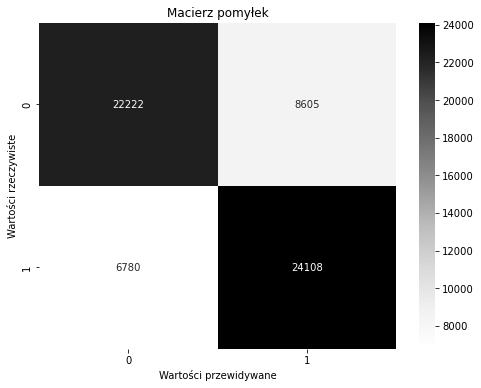

In [115]:
labels = ['0', '1']  


plt.figure(figsize=(8, 6))
sns.heatmap(macierz_pomylek_xgb, annot=True, fmt="d", cmap="Greys", xticklabels=labels, yticklabels=labels)
plt.xlabel('Wartości przewidywane')
plt.ylabel('Wartości rzeczywiste')
plt.title('Macierz pomyłek')
plt.savefig('macierz_pomylek_xgboost.png', dpi=300, bbox_inches='tight')
plt.show()

#### Miary jakości klasyfikatora

In [116]:
TN = macierz_pomylek_xgb[0, 0]
FP = macierz_pomylek_xgb[0, 1]
FN = macierz_pomylek_xgb[1, 0]
TP = macierz_pomylek_xgb[1, 1]

czulosc = TP / (TP + FN)
specyficznosc = TN / (TN + FP)
precyzja = TP / (TP + FP)
statystyka_f1 = 2 * (precyzja * czulosc) / (precyzja + czulosc)

print("Czułość:", round(czulosc,4))
print("Specyficzność:", round(specyficznosc,4))
print("Precyzja:", round(precyzja,4))
print("F1-score:", round(statystyka_f1, 4))

Czułość: 0.7805
Specyficzność: 0.7209
Precyzja: 0.737
F1-score: 0.7581


#### Krzywa ROC

In [117]:
y_pred_prob_xgb = xgb_model_best.predict_proba(dane_test_x)[:,1]

fpr, tpr, prog_odciecia = roc_curve(dane_test_y, y_pred_prob_xgb)

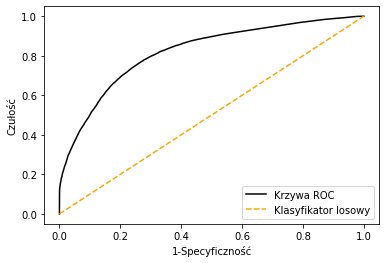

In [118]:
plt.plot(fpr, tpr, label = "Krzywa ROC", color = "black")
plt.plot([0,1], [0,1], linestyle = "--", label = "Klasyfikator losowy", color = "orange")
plt.xlabel("1-Specyficzność")
plt.ylabel("Czułość")
plt.legend()
plt.savefig('roc_xgboost.png', dpi=300, bbox_inches='tight')
plt.show()

In [119]:
auc_xgb = roc_auc_score(dane_test_y, y_pred_prob_xgb)

print("Pole pod krzywą ROC wynosi: ", round(auc_xgb, 4))

Pole pod krzywą ROC wynosi:  0.8201


#### Istotność cech

In [120]:
waznosc_xgb = xgb_model_best.feature_importances_
cechy_xgb = dane_train_x.columns


waznosc_df_xgb = pd.DataFrame({'Cecha': cechy_xgb, 'Ważność': waznosc_xgb})
waznosc_df_xgb = waznosc_df_xgb.sort_values(by='Ważność', ascending=False)
waznosc_df_xgb['Ważność'] = round(waznosc_df_xgb['Ważność'], 4)

print(waznosc_df_xgb)

                                    Cecha  Ważność
12                   attack_Assassination   0.2578
0                                extended   0.1775
19                         targtype_Other   0.1620
13               attack_Bombing/Explosion   0.0970
10                  region_Western Europe   0.0640
16               attack_Other attack type   0.0351
14  attack_Facility/Infrastructure Attack   0.0226
7                       region_South Asia   0.0193
4       region_Middle East & North Africa   0.0188
5                     region_Other region   0.0182
9               region_Sub-Saharan Africa   0.0176
2                              group_name   0.0141
21   targtype_Private Citizens & Property   0.0122
6                    region_South America   0.0111
8                   region_Southeast Asia   0.0109
3                   region_Eastern Europe   0.0102
1                                multiple   0.0098
11                   attack_Armed Assault   0.0096
15     attack_Hostage Taking (K

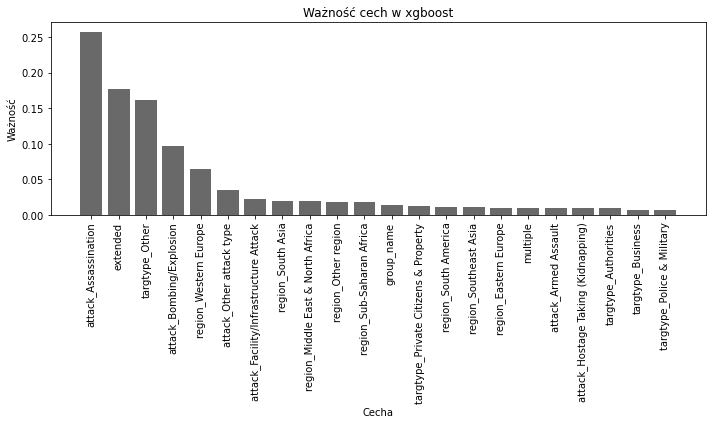

In [121]:
plt.figure(figsize=(10, 6))
plt.bar(waznosc_df_xgb['Cecha'], waznosc_df_xgb['Ważność'], color='dimgray')


plt.title('Ważność cech w xgboost')
plt.xlabel('Cecha')
plt.ylabel('Ważność')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('waznosc_xgb.png', dpi=300, bbox_inches='tight')
plt.show()